In [ ]:
import os
import argparse
import numpy as np
import random
import pickle
from collections import defaultdict
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, ConcatDataset
from torch.utils.data.sampler import WeightedRandomSampler
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import WandbLogger
from pytorch_lightning.callbacks import ModelCheckpoint
import wandb
from einops import rearrange
import einops as ein
import torch 
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable


root_dir = os.getcwd()
# os.chdir('/tmp/eigentasks/data')

os.chdir('/scratch/ainaz/omnidata2/omnidata_sasha_edits')
from omnidata.component_datasets.taskonomy import TaskonomyDataset
from omnidata.component_datasets.replica import ReplicaDataset
from omnidata.component_datasets.gso_in_replica import GSOReplicaDataset
from omnidata.component_datasets.hypersim import HypersimDataset




# from omnidata.taskonomy_replica_gso_dataset import TaskonomyReplicaGsoDataset, REPLICA_BUILDINGS
# os.chdir(root_dir)

In [ ]:
!rm ./.data_cache/*

In [ ]:
n_workers = None
opts = TaskonomyDataset.Options(data_path='/datasets/taskonomy', data_amount='fullplus', n_workers=n_workers)
tds = TaskonomyDataset(opts)

opts = ReplicaDataset.Options(data_path='/scratch/ainaz/replica-taskonomized', n_workers=n_workers)
rds = ReplicaDataset(opts)

opts = GSOReplicaDataset.Options(data_path='/scratch/ainaz/replica-google-objects', n_workers=n_workers)
gds = GSOReplicaDataset(opts)

opts = HypersimDataset.Options(data_path='/scratch/ainaz/hypersim-dataset2/evermotion/scenes', n_workers=n_workers)
hds = HypersimDataset(opts)

Loading rgb paths (72 workers):   0%|          | 0/380 [00:00<?, ?it/s]

!!!!!!!!!!!! rgb :  3411827
!!!!!!!!!!!! semantic segmentation :  0


Loaded 3411827 images in 52.15 seconds
	 (380 buildings) (504931 points) (3411827 images) for domains ['rgb']


Loading rgb paths (72 workers):   0%|          | 0/10 [00:00<?, ?it/s]

Loaded 56783 images in 4.85 seconds
	 (10 buildings) (2372 points) (56783 images) for domains ['rgb']


!!!!!!!!!!!! rgb :  56783
!!!!!!!!!!!! semantic segmentation :  0


Loading rgb paths (72 workers):   0%|          | 0/30 [00:00<?, ?it/s]

!!!!!!!!!!!! rgb :  107404
!!!!!!!!!!!! semantic segmentation :  0


Loaded 107404 images in 5.66 seconds
	 (30 buildings) (8767 points) (107404 images) for domains ['rgb']


Loading cached data URLS from ./.data_cache/HypersimDataset_rgb_tiny-train.pkl
Loaded train (amount: tiny) with 57578 images from ./.data_cache/HypersimDataset_rgb_tiny-train.pkl.
!!!!!!!!!!!! rgb :  57578
!!!!!!!!!!!! semantic segmentation :  0


Loaded 57578 images in 1.38 seconds
	 (605 buildings) (57578 points) (57578 images) for domains ['rgb']


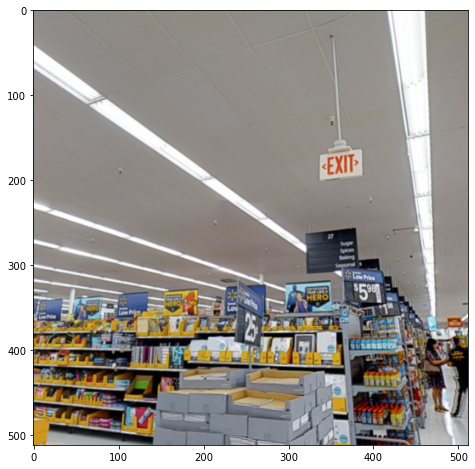

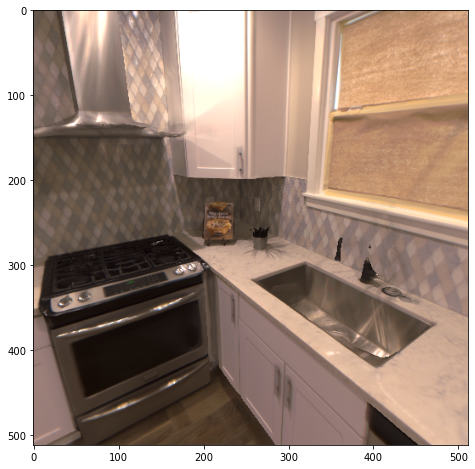

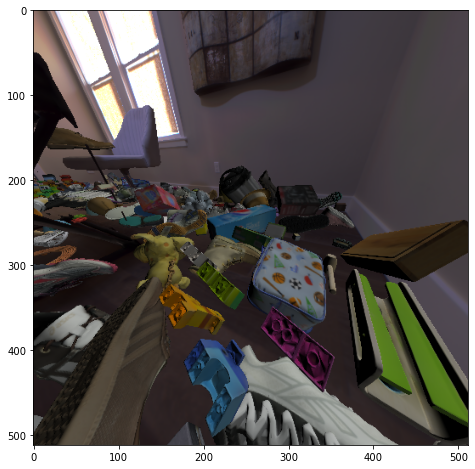

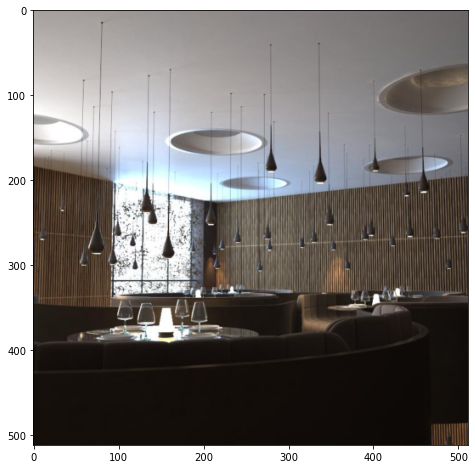

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(tds[0]['positive']['rgb'].permute([1,2,0]))
plt.show()

plt.figure(figsize=(8,8))
plt.imshow(rds[0]['positive']['rgb'].permute([1,2,0]))
plt.show()

plt.figure(figsize=(8,8))
plt.imshow(gds[0]['positive']['rgb'].permute([1,2,0]))
plt.show()

plt.figure(figsize=(8,8))
plt.imshow(hds[0]['positive']['rgb'].permute([1,2,0]))
plt.show()

TypeError: Image data of dtype object cannot be converted to float

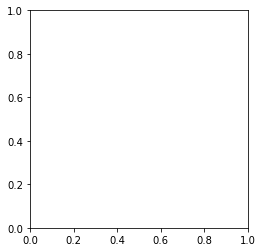

In [ ]:
plt.imshow(ds[0])

In [ ]:
assert False

AssertionError: 